In [17]:
from pybaseball import statcast
from pybaseball import pitching_stats_bref
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
bref_df = pitching_stats_bref("2023")
bref_df = bref_df[["Name", "ERA"]]

bref_df

,Name,ERA
1,Fernando Abad,4.26
2,Andrew Abbott,3.35
3,Cory Abbott,7.48
4,Albert Abreu,4.58
5,Bryan Abreu,2.07
...,...,...
844,Danny Young,1.08
845,Rob Zastryzny,5.21
846,Angel Zerpa,7.04
847,Bruce Zimmermann,5.56


In [19]:
savant_df = statcast(start_dt= "2023-03-30", end_dt = "2023-11-15")

#pd.set_option('display.max_columns', None)
savant_df

This is a large query, it may take a moment to complete


100%|██████████| 231/231 [00:20<00:00, 11.49it/s]


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
985,SI,2023-08-31,93.1,1.85,5.7,"Alexander, Scott",665742,518397,grounded_into_double_play,hit_into_play,...,7,7,2,2,7,Strategic,Standard,140,-0.006,-0.394
1020,SI,2023-08-31,94.2,1.89,5.65,"Alexander, Scott",673490,518397,single,hit_into_play,...,7,7,2,2,7,Standard,Standard,132,0.003,0.554
1047,SI,2023-08-31,92.6,1.86,5.62,"Alexander, Scott",673490,518397,None,ball,...,7,7,1,1,7,Standard,Standard,126,0.0,0.042
1090,SI,2023-08-31,92.6,1.82,5.72,"Alexander, Scott",640492,518397,double,hit_into_play,...,7,7,1,1,7,Standard,Standard,134,0.002,0.39
1119,SI,2023-08-31,92.2,2.0,5.6,"Alexander, Scott",640492,518397,None,ball,...,7,7,1,1,7,Standard,Standard,125,0.0,0.026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,SI,2023-03-30,95.3,-3.11,5.24,"Castillo, Luis",680757,622491,None,called_strike,...,0,0,0,0,0,Standard,Standard,234,0.0,-0.081
4077,FF,2023-03-30,94.2,-3.16,5.29,"Castillo, Luis",680757,622491,None,called_strike,...,0,0,0,0,0,Standard,Strategic,229,0.0,-0.075
4211,FF,2023-03-30,94.8,-3.12,5.3,"Castillo, Luis",680757,622491,None,ball,...,0,0,0,0,0,Standard,Strategic,233,0.0,0.134
4374,SI,2023-03-30,95.1,-3.2,5.22,"Castillo, Luis",680757,622491,None,ball,...,0,0,0,0,0,Standard,Standard,237,0.0,0.063


In [20]:
# Converts the Induced Vertical Break and Horizontal Break to inches from feet
savant_df['IVB'] = savant_df['pfx_z'] * 12
savant_df['HB'] = savant_df['pfx_x'] * 12

savant_df = savant_df.rename(columns={'player_name': 'Name', 'pitch_type': 'Pitch Type'})
savant_df

,Pitch Type,game_date,release_speed,release_pos_x,release_pos_z,Name,batter,pitcher,events,description,...,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,IVB,HB
985,SI,2023-08-31,93.1,1.85,5.7,"Alexander, Scott",665742,518397,grounded_into_double_play,hit_into_play,...,2,2,7,Strategic,Standard,140,-0.006,-0.394,5.4,15.36
1020,SI,2023-08-31,94.2,1.89,5.65,"Alexander, Scott",673490,518397,single,hit_into_play,...,2,2,7,Standard,Standard,132,0.003,0.554,5.28,14.52
1047,SI,2023-08-31,92.6,1.86,5.62,"Alexander, Scott",673490,518397,None,ball,...,1,1,7,Standard,Standard,126,0.0,0.042,2.76,12.36
1090,SI,2023-08-31,92.6,1.82,5.72,"Alexander, Scott",640492,518397,double,hit_into_play,...,1,1,7,Standard,Standard,134,0.002,0.39,5.28,13.56
1119,SI,2023-08-31,92.2,2.0,5.6,"Alexander, Scott",640492,518397,None,ball,...,1,1,7,Standard,Standard,125,0.0,0.026,2.28,14.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3826,SI,2023-03-30,95.3,-3.11,5.24,"Castillo, Luis",680757,622491,None,called_strike,...,0,0,0,Standard,Standard,234,0.0,-0.081,5.52,-20.28
4077,FF,2023-03-30,94.2,-3.16,5.29,"Castillo, Luis",680757,622491,None,called_strike,...,0,0,0,Standard,Strategic,229,0.0,-0.075,13.92,-15.36
4211,FF,2023-03-30,94.8,-3.12,5.3,"Castillo, Luis",680757,622491,None,ball,...,0,0,0,Standard,Strategic,233,0.0,0.134,14.28,-9.6
4374,SI,2023-03-30,95.1,-3.2,5.22,"Castillo, Luis",680757,622491,None,ball,...,0,0,0,Standard,Standard,237,0.0,0.063,4.92,-20.52


In [21]:
def flip_names(name):
    first_name, last_name = name.split(", ")
    return f"{last_name} {first_name}"

savant_df['Name'] = savant_df["Name"].apply(flip_names)

In [22]:
pitches_grouped = savant_df.groupby(['Name', 'Pitch Type']).agg(
    Pitches = ('Pitch Type', 'count'), 
    Average_Velo = ('release_speed', 'mean'),
    Max_Velo = ('release_speed', 'max'),
    Spin_Rate = ('release_spin_rate', 'mean'),
    Induced_Vertical_Break = ('IVB', 'mean'),
    Horizontal_Break = ('HB', 'mean'),
    Release_Height = ('release_pos_z', 'mean'),
    Extension = ('release_extension', 'mean'),
    AVG_Exit_Velo = ('launch_speed', 'mean'),
    xwOBA = ('estimated_woba_using_speedangle', 'mean'),
    Run_Value = ('delta_run_exp', 'sum'),
    CS_Percent = ('description', lambda x: round((x == 'called_strike').mean() * 100, 2)),
    SwStr_Percent = ('description', lambda x: round((x.isin(['swinging_strike', 'swinging_strike_blocked'])).mean() * 100, 2)))

pitches_grouped = pitches_grouped.rename(columns = {"CS_Percent": "CS%", "SwStr_Percent": "SwStr%"})
pitches_grouped['CSW_Percent'] = pitches_grouped['SwStr%'] + pitches_grouped['CS%']
pitches_grouped = pitches_grouped.reset_index()
pitches_grouped

,Name,Pitch Type,Pitches,Average_Velo,Max_Velo,Spin_Rate,Induced_Vertical_Break,Horizontal_Break,Release_Height,Extension,AVG_Exit_Velo,xwOBA,Run_Value,CS%,SwStr%,CSW_Percent
0,A.J. Minter,CH,114,86.468421,88.9,1644.0,5.165263,15.685263,5.659474,6.218018,75.957895,0.2735,-1.912,7.02,16.67,23.69
1,A.J. Minter,FC,337,89.39911,92.2,2560.095522,3.251751,-5.400712,5.813472,6.284084,82.307767,0.433217,2.293,19.58,17.21,36.79
2,A.J. Minter,FF,408,95.783824,97.6,2422.72973,16.693529,6.814412,5.792721,6.385891,82.099351,0.402254,-4.846,13.48,9.07,22.55
3,A.J. Puk,CH,12,87.3,89.1,1132.454545,3.26,10.49,5.331667,7.141667,81.7,0.324,-0.448,16.67,8.33,25.00
4,A.J. Puk,FF,402,95.876276,99.2,2199.688776,13.05403,11.910149,5.339229,7.198724,83.024627,0.37415,-1.623,23.63,12.69,36.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3342,Zack Wheeler,FC,2,92.95,93.3,2610.5,3.96,0.36,5.34,6.4,100.2,0.867,0.908,0.00,0.00,0.00
3343,Zack Wheeler,FF,1077,95.92052,98.5,2503.402043,15.443788,-6.443565,5.468422,7.23714,82.857263,0.348752,-14.065,19.41,13.56,32.97
3344,Zack Wheeler,SI,465,95.271183,98.3,2318.9718,8.534194,-15.639742,5.362903,7.253548,78.257732,0.296375,-4.334,15.70,9.03,24.73
3345,Zack Wheeler,SL,401,90.873815,94.5,2572.520101,6.04788,2.503242,5.39798,7.098005,82.348,0.383094,1.277,7.98,10.97,18.95


In [23]:
player_grouped = savant_df.groupby(['Name']).agg(
    Pitches = ('Pitch Type', 'count'),
    BB = ('events', lambda x: (x == 'walk').sum()),
    HBP = ('events', lambda x: (x == 'hit_by_pitch').sum()),
    K = ('events', lambda x: (x == 'strikeout').sum()),
    TBF = ('events', lambda x: (x.isin(['other_out', 'single', 'double', 'triple', 'home_run', 'walk', 'strikeout', 'field_out', 'hit_by_pitch', 'sac_fly', 'sac_fly_double_play', 'sac_bunt', 'field_error', 'fielders_choice', 'double_play', 'fielders_choice_out', 'sac_fly_double_play', 'strikeout_double_play', 'catcher_interf', 'triple_play', 'grounded_into_double_play'])).sum()),
    GB = ('bb_type', lambda x: (x == 'ground_ball').sum()),
    BIP = ('bb_type', lambda x: (x.isin(['ground_ball', 'line_drive', 'fly_ball', 'popup'])).sum()),
    xwOBA = ('estimated_woba_using_speedangle', 'mean'),
    Run_Value = ('delta_run_exp', 'sum'),
    CS_Percent = ('description', lambda x: round((x == 'called_strike').mean() * 100, 2)),
    SwStr_Percent = ('description', lambda x: round((x.isin(['swinging_strike', 'swinging_strike_blocked'])).mean() * 100, 2)))

player_grouped['xwOBA'] = round(player_grouped['xwOBA'], 3)
player_grouped = player_grouped.rename(columns = {"CS_Percent": "CS%", "SwStr_Percent": "SwStr%"})
player_grouped['CSW%'] = player_grouped['SwStr%'] + player_grouped['CS%']
player_grouped['GB%'] = round((player_grouped['GB'] / player_grouped['BIP']) * 100, 2)
player_grouped['BB%'] = round((player_grouped['BB'] / player_grouped['TBF']) * 100, 2)
player_grouped['HBP%'] = round((player_grouped['HBP'] / player_grouped['TBF']) * 100, 2)
player_grouped['K%'] = round((player_grouped['K'] / player_grouped['TBF']) * 100, 2)
player_grouped['K-BB%'] = round((player_grouped['K%'] - player_grouped['BB%']), 2)

player_grouped = player_grouped[player_grouped['TBF'] >= 350]
player_grouped

,Pitches,BB,HBP,K,TBF,GB,BIP,xwOBA,Run_Value,CS%,SwStr%,CSW%,GB%,BB%,HBP%,K%,K-BB%
Name,,,,,,,,,,,,,,,,,
Aaron Civale,1629,24,3,83,408,125,305,0.343,-21.894,19.34,9.70,29.04,40.98,5.88,0.74,20.34,14.46
Aaron Nola,2625,41,1,170,666,190,463,0.378,-0.082,18.02,12.08,30.10,41.04,6.16,0.15,25.53,19.37
Adam Wainwright,1494,32,1,45,393,130,327,0.43,37.32,19.21,4.82,24.03,39.76,8.14,0.25,11.45,3.31
Adrian Houser,1538,28,1,76,390,138,292,0.363,4.994,18.01,7.02,25.03,47.26,7.18,0.26,19.49,12.31
Alek Manoah,1689,56,9,79,405,104,268,0.402,20.953,15.39,8.82,24.21,38.81,13.83,2.22,19.51,5.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yusei Kikuchi,2310,38,4,146,568,151,389,0.387,-13.218,15.76,12.47,28.23,38.82,6.69,0.70,25.70,19.01
Zac Gallen,2664,37,3,179,684,189,473,0.401,-22.82,16.82,11.45,28.27,39.96,5.41,0.44,26.17,20.76
Zach Eflin,2158,19,2,150,582,217,421,0.343,-17.528,19.37,10.98,30.35,51.54,3.26,0.34,25.77,22.51


In [24]:
# Creation of my stat Simple Predicted Run Average
player_grouped["PRA"] = round(((8 * (player_grouped["BB"] + player_grouped["HBP"]) - 4 * (player_grouped["K"])) / player_grouped["TBF"]) - (2 * ((player_grouped["GB"]) / player_grouped["BIP"])) + 5, 2)
player_grouped = player_grouped.sort_values(by = "PRA")
player_grouped = player_grouped.reset_index()
player_grouped

,Name,Pitches,BB,HBP,K,TBF,GB,BIP,xwOBA,Run_Value,CS%,SwStr%,CSW%,GB%,BB%,HBP%,K%,K-BB%,PRA
0,Logan Webb,2679,27,4,169,703,315,514,0.367,-16.022,20.31,8.81,29.12,61.28,3.84,0.57,24.04,20.20,3.17
1,Zach Eflin,2158,19,2,150,582,217,421,0.343,-17.528,19.37,10.98,30.35,51.54,3.26,0.34,25.77,22.51,3.23
2,George Kirby,2325,14,4,142,612,205,458,0.375,-19.113,16.60,10.54,27.14,44.76,2.29,0.65,23.20,20.91,3.41
3,Kevin Gausman,2579,40,3,202,633,169,394,0.409,-10.246,16.63,12.91,29.54,42.89,6.32,0.47,31.91,25.59,3.41
4,Spencer Strider,2632,48,8,245,632,121,342,0.39,-18.303,14.74,19.77,34.51,35.38,7.59,1.27,38.77,31.18,3.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,Cristian Javier,2361,51,7,119,557,104,386,0.385,-0.496,13.38,11.14,24.52,26.94,9.16,1.26,21.36,12.20,4.44
124,Josiah Gray,2449,70,8,119,595,160,409,0.375,-6.432,14.82,11.19,26.01,39.12,11.76,1.34,20.00,8.24,4.47
125,Tyler Anderson,2146,54,5,102,543,120,389,0.38,12.322,13.65,12.58,26.23,30.85,9.94,0.92,18.78,8.84,4.50
126,Alek Manoah,1689,56,9,79,405,104,268,0.402,20.953,15.39,8.82,24.21,38.81,13.83,2.22,19.51,5.68,4.73


In [25]:
player_grouped[player_grouped['Name'] == "Spencer Strider"]

,Name,Pitches,BB,HBP,K,TBF,GB,BIP,xwOBA,Run_Value,CS%,SwStr%,CSW%,GB%,BB%,HBP%,K%,K-BB%,PRA
4,Spencer Strider,2632,48,8,245,632,121,342,0.39,-18.303,14.74,19.77,34.51,35.38,7.59,1.27,38.77,31.18,3.45


In [26]:
player_grouped.head(25)

,Name,Pitches,BB,HBP,K,TBF,GB,BIP,xwOBA,Run_Value,CS%,SwStr%,CSW%,GB%,BB%,HBP%,K%,K-BB%,PRA
0,Logan Webb,2679,27,4,169,703,315,514,0.367,-16.022,20.31,8.81,29.12,61.28,3.84,0.57,24.04,20.20,3.17
1,Zach Eflin,2158,19,2,150,582,217,421,0.343,-17.528,19.37,10.98,30.35,51.54,3.26,0.34,25.77,22.51,3.23
2,George Kirby,2325,14,4,142,612,205,458,0.375,-19.113,16.60,10.54,27.14,44.76,2.29,0.65,23.20,20.91,3.41
3,Kevin Gausman,2579,40,3,202,633,169,394,0.409,-10.246,16.63,12.91,29.54,42.89,6.32,0.47,31.91,25.59,3.41
4,Spencer Strider,2632,48,8,245,632,121,342,0.39,-18.303,14.74,19.77,34.51,35.38,7.59,1.27,38.77,31.18,3.45
5,Framber Valdez,2489,43,8,164,662,257,462,0.381,-13.888,17.02,11.48,28.50,55.63,6.50,1.21,24.77,18.27,3.51
6,Braxton Garrett,2129,22,10,136,566,202,410,0.406,-8.287,19.07,11.88,30.95,49.27,3.89,1.77,24.03,20.14,3.51
7,Clayton Kershaw,1727,29,3,120,439,138,292,0.367,-19.176,15.69,13.67,29.36,47.26,6.61,0.68,27.33,20.72,3.54
8,Alex Cobb,2317,35,5,125,586,247,433,0.39,-10.903,19.12,8.93,28.05,57.04,5.97,0.85,21.33,15.36,3.55
9,Logan Gilbert,2359,28,2,153,613,183,437,0.372,-12.269,15.09,11.87,26.96,41.88,4.57,0.33,24.96,20.39,3.56


In [27]:
print(f"League Mean PRA is: {round(player_grouped['PRA'].mean(), 3)}")
print(f"League Median PRA is: {round(player_grouped['PRA'].median(), 3)}")

League Mean PRA is: 3.943
League Median PRA is: 3.925


In [31]:
top25 = pd.merge(bref_df, player_grouped, on='Name', how='left')
top25 = top25.sort_values(by = "PRA")
top25 = top25[["Name", "PRA", "ERA"]].head(25)
top25

,Name,PRA,ERA
769,Logan Webb,3.17,3.49
196,Zach Eflin,3.23,3.40
378,George Kirby,3.41,3.28
247,Kevin Gausman,3.41,3.30
695,Spencer Strider,3.45,3.56
244,Braxton Garrett,3.51,3.86
735,Framber Valdez,3.51,3.38
369,Clayton Kershaw,3.54,2.48
139,Alex Cobb,3.55,3.57
251,Logan Gilbert,3.56,3.66


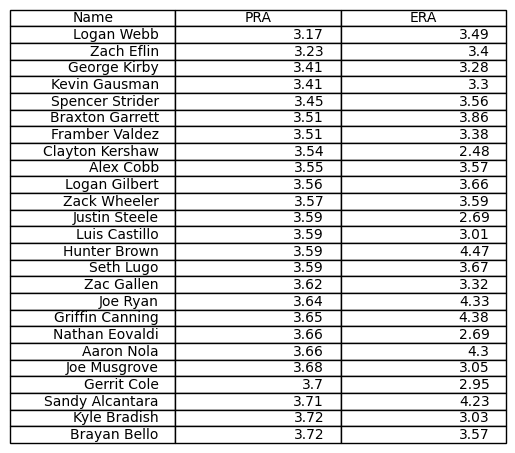

In [33]:
fig, ax = plt.subplots(1, 1)
ax.axis('off')
ax.axis('tight')
ax.table(cellText= top25.values, colLabels= top25.columns, loc='center')

#plt.savefig("Top25.png")
plt.show()